# Breast Cancer Wisconsin (Diagnostic) Data Set

Predict whether the cancer is benign or malignant

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, classification_report
import scipy.stats as stats
from imblearn.over_sampling import RandomOverSampler
import opendatasets as od
import warnings

sns.set()
warnings.filterwarnings('ignore')

In [2]:
# Download data from Kaggle
od.download('https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data')

Skipping, found downloaded files in "./breast-cancer-wisconsin-data" (use force=True to force download)


In [3]:
# Read the data into a DataFrame
df = pd.read_csv('breast-cancer-wisconsin-data/data.csv')

**Data Content**

* ID number
* Diagnosis (M = malignant, B = benign)
* radius (mean of distances from center to points on the perimeter)
* texture (standard deviation of gray-scale values)
* perimeter
* area
* smoothness (local variation in radius lengths)
* compactness (perimeter^2 / area - 1.0)
* concavity (severity of concave portions of the contour)
* concave points (number of concave portions of the contour)
* symmetry
* fractal dimension ("coastline approximation" - 1)
* The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.
* All feature values are recoded with four significant digits.
* Missing attribute values: none
* Class distribution: 357 benign, 212 malignant

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

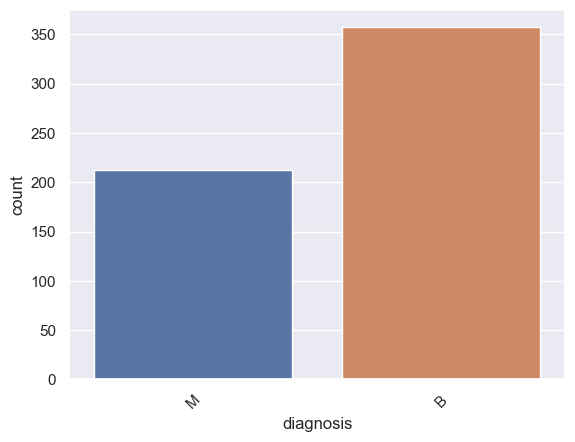

In [7]:
sns.countplot(x='diagnosis', data=df)
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, 'Classes')

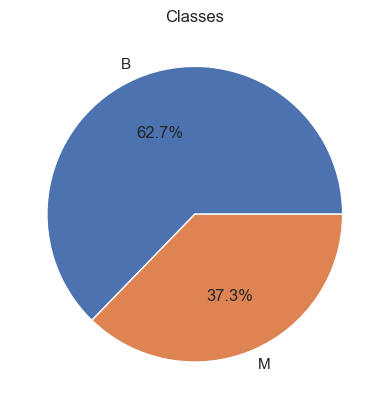

In [8]:
labels, counts = np.unique(df['diagnosis'], return_counts=True)
plt.pie(counts, autopct='%1.1f%%', labels=labels)
plt.title('Classes')

In [9]:
pd.Series(counts, index=labels)

B    357
M    212
dtype: int64

In [10]:
df["Unnamed: 32"]

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
564   NaN
565   NaN
566   NaN
567   NaN
568   NaN
Name: Unnamed: 32, Length: 569, dtype: float64

* The ID cannot be used for classificaiton.
* Diagnosis is our class label.
* Classes are unbalanced. This negatively affects the performance of our logistic regression to classify the classes with fewer records since there are very few elements that belong to them.
* Unnamed: 32 feature includes NaN so we do not need it.


In [11]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
cols = ['id', 'Unnamed: 32']
df = df.drop(cols, axis=1)

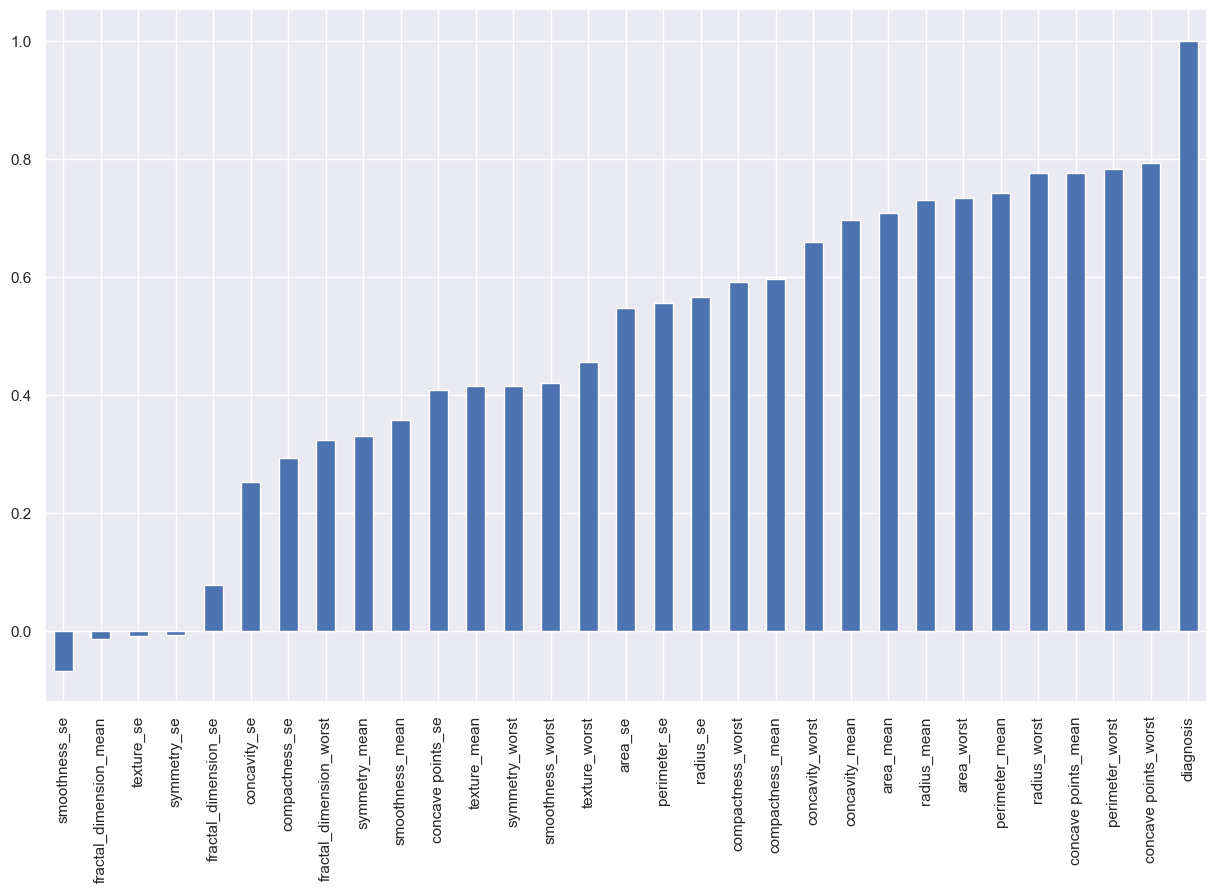

In [12]:
fig = plt.figure(figsize=(15,9))
df.corr()['diagnosis'].sort_values(ascending=True).plot(kind='bar')
plt.show()

In [13]:
class_label = 'diagnosis'
X = df.drop([class_label], axis=1)
y = df[class_label]

In [14]:
# Normalization or standardization
X_norm = (X - X.mean()) / (X.std())

In [15]:
def plot_features_with_violin_plot(X_norm_range, y):
    data = pd.concat([y, X_norm_range],axis=1)
    data = pd.melt(data,
                id_vars='diagnosis',
                var_name='features',
                value_name='value')
    plt.figure(figsize=(10,10))
    sns.violinplot(x='features', y='value', hue='diagnosis', data=data, split=True, inner='quart')
    plt.xticks(rotation=90)

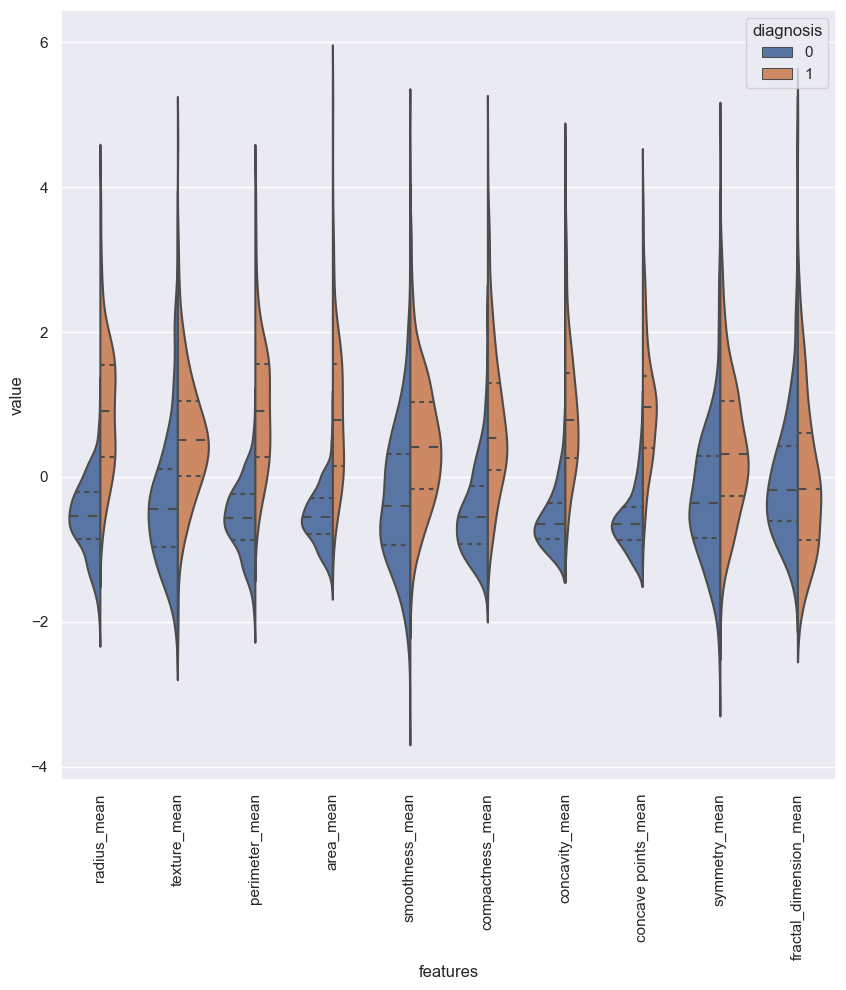

In [16]:
# Plot the first 10 features -> feature_mean
plot_features_with_violin_plot(X_norm.iloc[:,0:10], y)

This graph allows us to interpret whether the log metric is separable for benign or malignant cancer classes.

For example, in **texture_mean** feature, ***median*** of the Malignant and Benign looks like separated so it can be good for classification. However, in **fractal_dimension_mean** feature, ***median*** of the Malignant and Benign does not looks like separated so it does not gives good information for classification.

Also, we can say that **concavity_mean** and **concave points_mean** looks like similar.

In [17]:
def plot_relationship_between_variables(data, feature_1, feature_2):
    plot = sns.jointplot(data=data,
                  x=feature_1,
                  y=feature_2,
                  kind='reg',
                  color='#ce1414')
    r, p = stats.pearsonr(data[feature_1], data[feature_2])
    plot.ax_joint.annotate('r = {:.2f} '.format(r), xy=(.1, .1))
    # plot.ax_joint.annotate('p = {:.2e}'.format(p), xy=(.4, .1))
    plt.show()

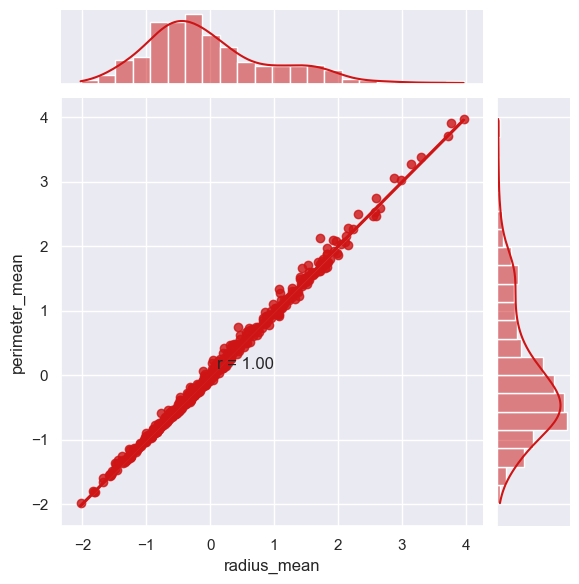

In [18]:
plot_relationship_between_variables(X_norm, 'radius_mean', 'perimeter_mean')
# super correlation

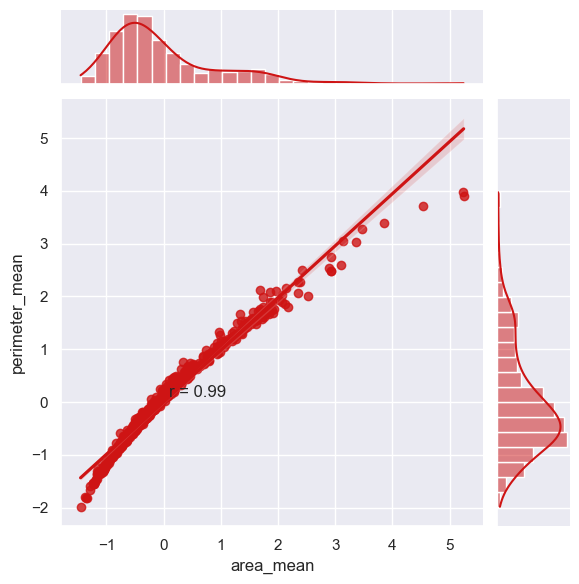

In [19]:
plot_relationship_between_variables(X_norm, 'area_mean', 'perimeter_mean')
# super corr

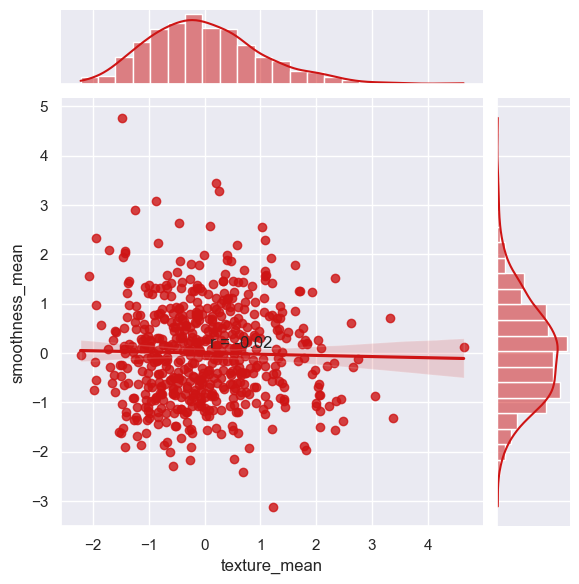

In [20]:
plot_relationship_between_variables(X_norm, 'texture_mean', 'smoothness_mean')

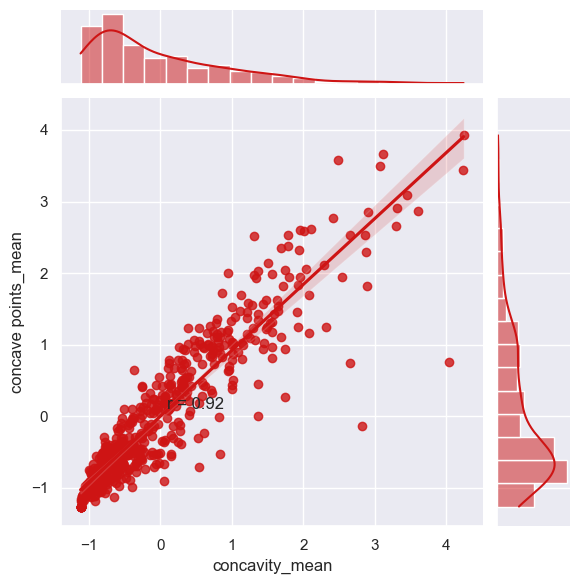

In [21]:
plot_relationship_between_variables(X_norm, 'concavity_mean', 'concave points_mean')
# We can see that these two variables are indeed correlated.
# Pearsonr (r) value is correlation value and 1 is the highest.
# Therefore, 0.92 is looks enough to say that they are correlated. 

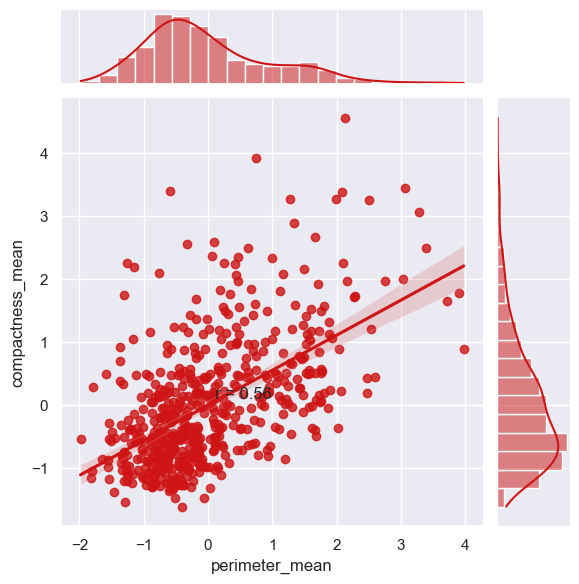

In [22]:
plot_relationship_between_variables(X_norm, 'perimeter_mean', 'compactness_mean')

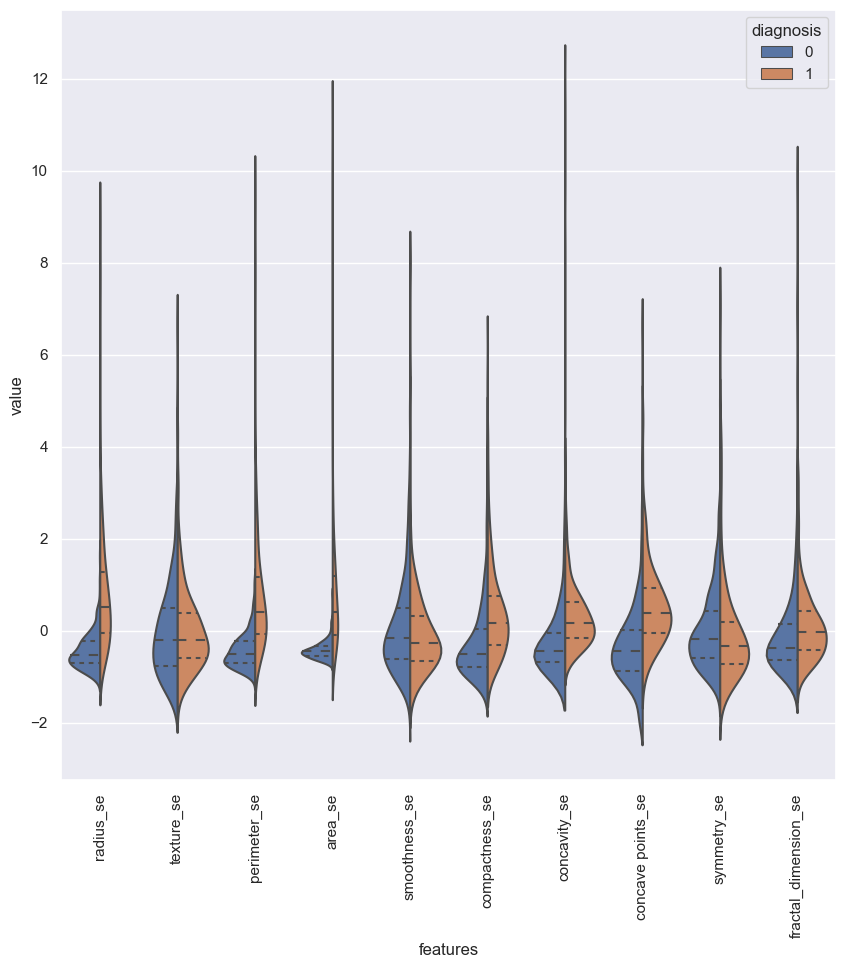

In [23]:
# Plot the second 10 features -> feature_se
plot_features_with_violin_plot(X_norm.iloc[:,10:20], y)

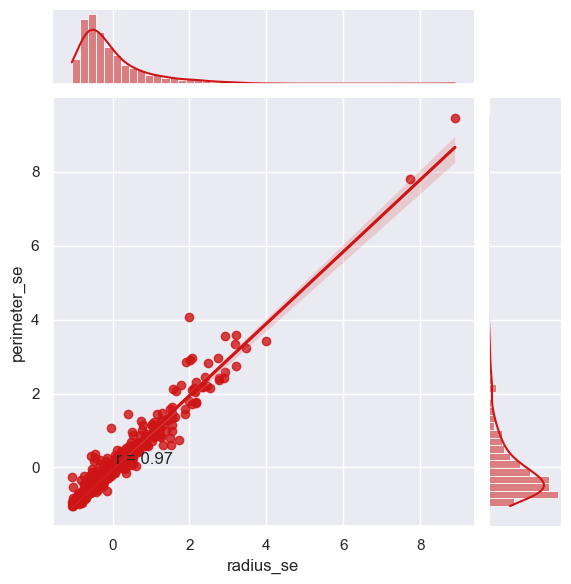

In [24]:
plot_relationship_between_variables(X_norm, 'radius_se', 'perimeter_se')
# We see that these two variables are also correlated.

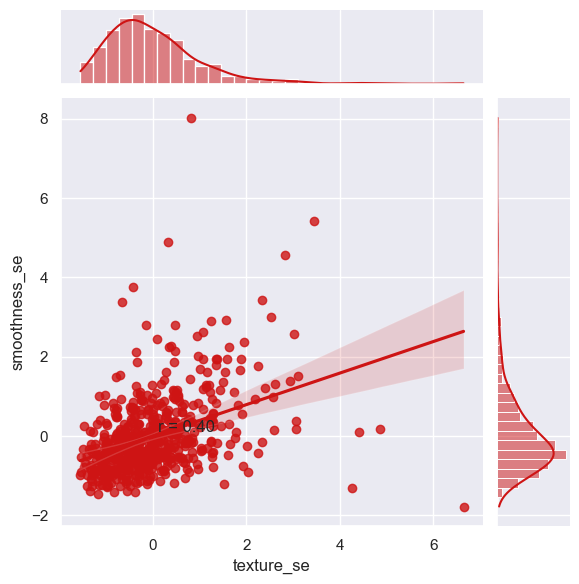

In [25]:
plot_relationship_between_variables(X_norm, 'texture_se', 'smoothness_se')
# At first glance it seemed that these two variables were correlated.
# But we have verified that in reality they are not

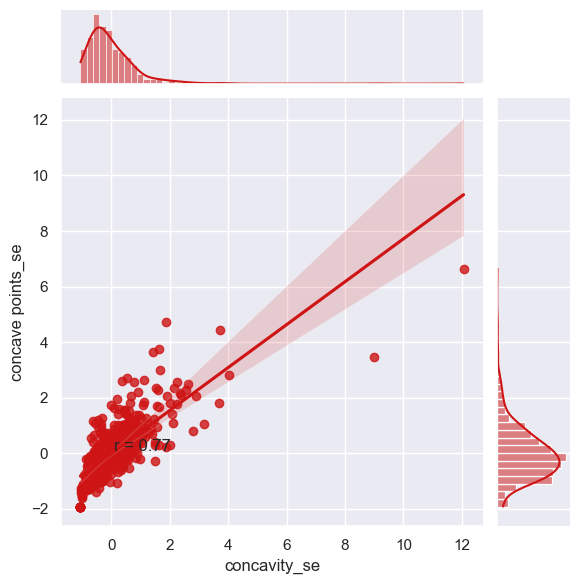

In [26]:
plot_relationship_between_variables(X_norm, 'concavity_se', 'concave points_se')

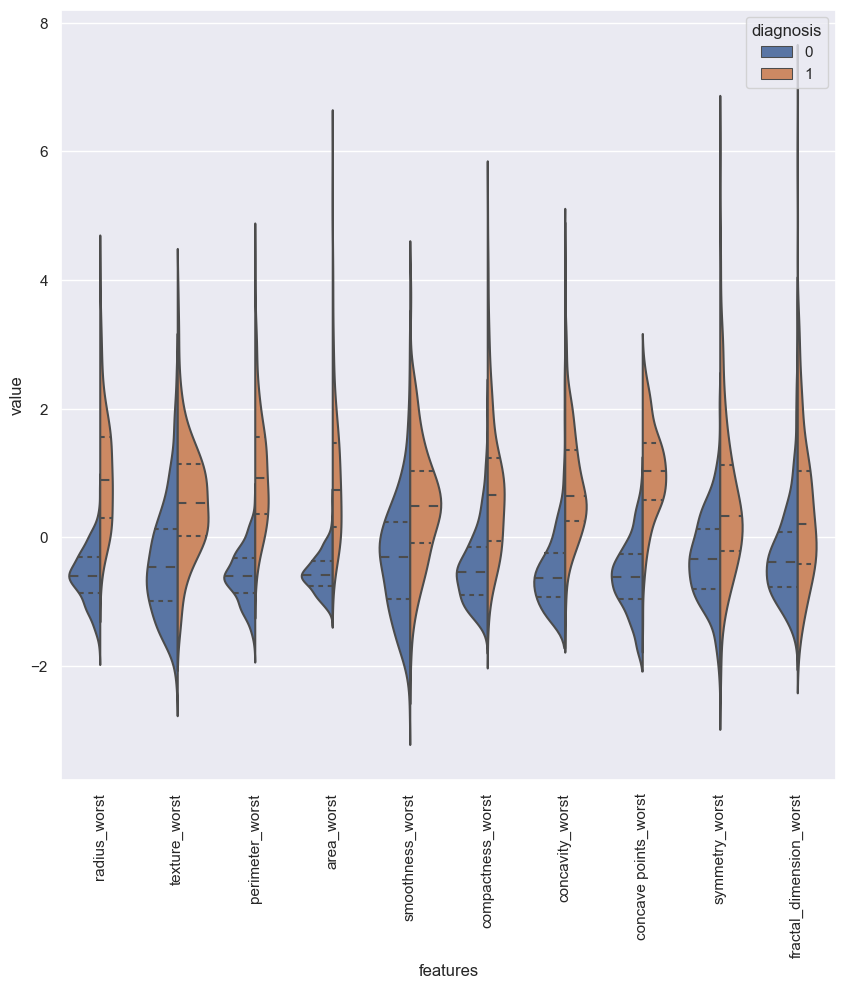

In [27]:
# Plot the third 10 features -> feature_worst
plot_features_with_violin_plot(X_norm.iloc[:,20:30], y)

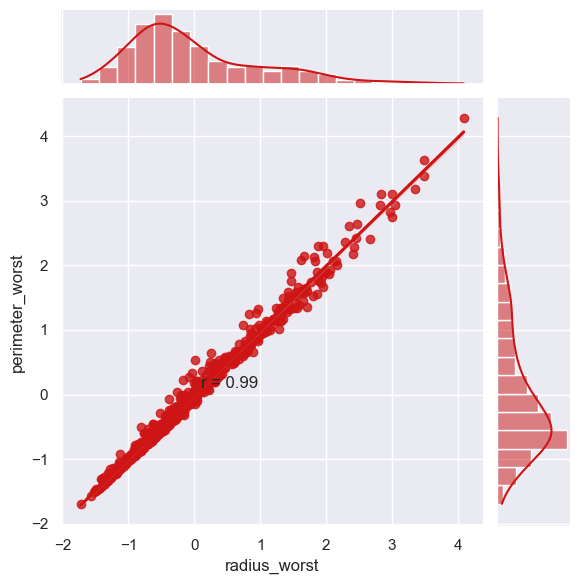

In [28]:
plot_relationship_between_variables(X_norm, 'radius_worst', 'perimeter_worst')
# We see that these two variables are also correlated.

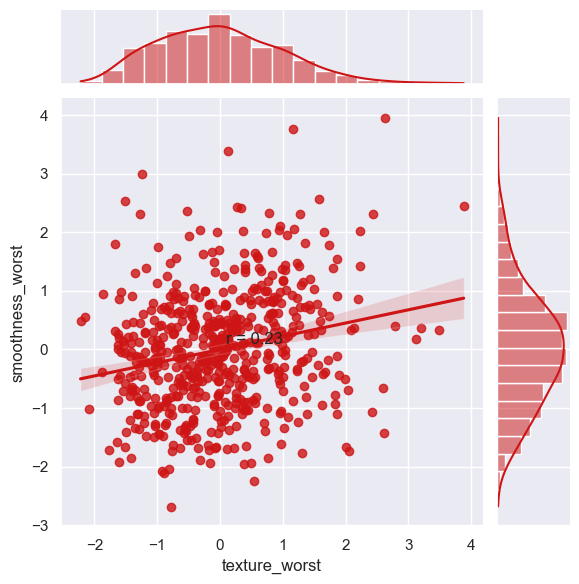

In [29]:
plot_relationship_between_variables(X_norm, 'texture_worst', 'smoothness_worst')

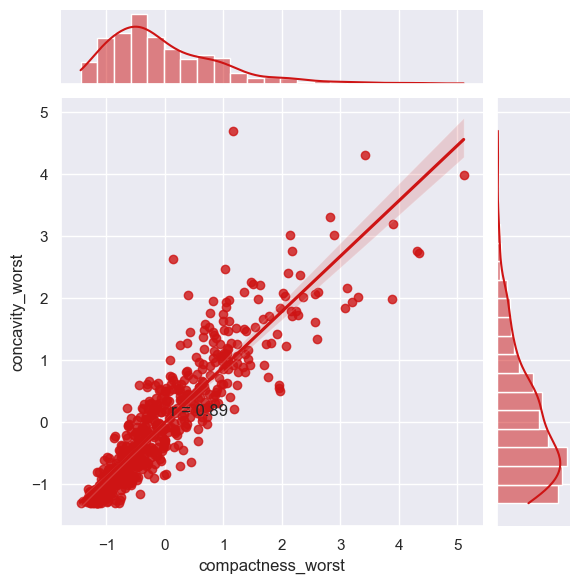

In [30]:
plot_relationship_between_variables(X_norm, 'compactness_worst', 'concavity_worst')
# We see that these two variables are also correlated.

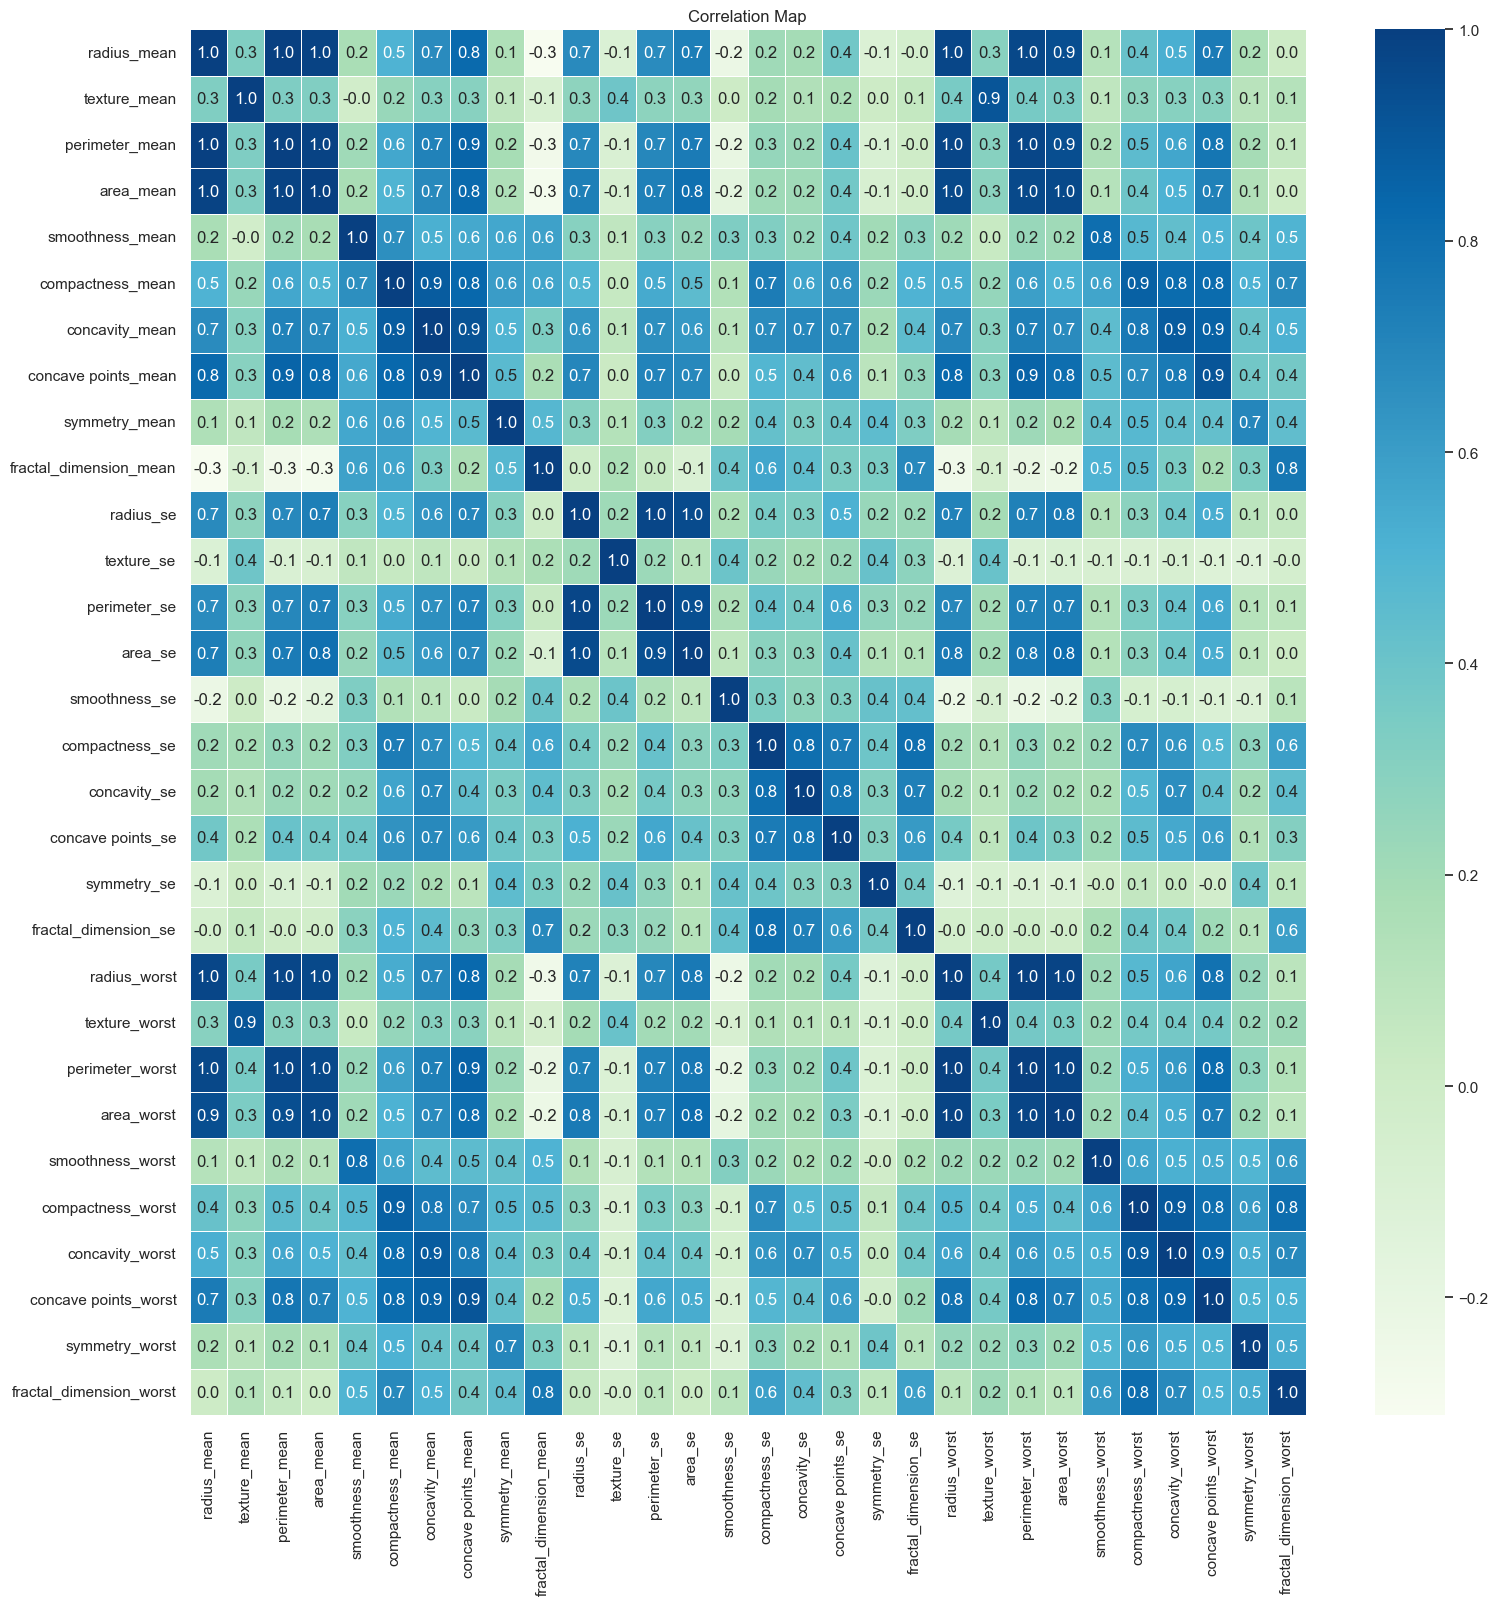

In [31]:
f, ax = plt.subplots(figsize = (18,18))
sns.heatmap(X_norm.corr(), annot=True, linewidths=0.5, fmt=".1f", ax=ax, cmap='GnBu')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Map')
plt.show()

As it can be seen in map heat figure:

* According to radius, perimeter and area:
    * **radius_mean**, **perimeter_mean** and **area_mean** are correlated with each other. We use **perimeter_mean**.
    * **radius_mean** and **radius_worst** are correlated.
    * **radius_mean** and **perimeter_worst** are correlated.
    * **radius_mean** and **area_worst** are correlated.

    * **perimeter_mean** and **radius_worst** are correlated.
    * **perimeter_mean** and **perimeter_worst** are correlated. We use **perimeter_worst**.
    * **perimeter_mean** and **area_worst** are correlated.

    * **radius_se**, **perimeter_se** and **area_se** are correlated. We use **radius_se**.
    .

* According to compactness, oncavity and concave points:
    * **compactness_mean**, **concavity_mean** and **concave points_mean** are correlated with each other. We use **concave points_mean**.

    * **compactness_worst**, **concavity_worst** and **concave points_worst** so we use **concave points_worst**.
    .

* According to texture:
    * **texture_mean** and **texture_worst** are correlated and we use **texture_worst**.

In [32]:
features_to_remove = ['radius_mean', 'perimeter_mean', 'area_mean',
                      'radius_worst', 'area_worst',
                      'perimeter_se', 'area_se',
                      'compactness_mean', 'concavity_mean',
                      'concavity_worst', 'compactness_worst',
                      'texture_mean']
X_upd = X_norm.drop(features_to_remove, axis=1)
X_upd.head()

,smoothness_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,texture_worst,perimeter_worst,smoothness_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.567087,2.530249,2.215566,2.253764,2.487545,-0.564768,-0.213814,1.315704,0.723390,0.660239,1.147747,0.906286,-1.358098,2.301575,1.306537,2.294058,2.748204,1.935312
1,-0.826235,0.547662,0.001391,-0.867889,0.498816,-0.875473,-0.604819,-0.692317,-0.440393,0.259933,-0.804742,-0.099356,-0.368879,1.533776,-0.375282,1.086129,-0.243675,0.280943
2,0.941382,2.035440,0.938859,-0.397658,1.227596,-0.779398,-0.296744,0.814257,0.212889,1.423575,0.236827,0.293301,-0.023953,1.346291,0.526944,1.953282,1.151242,0.201214
3,3.280667,1.450431,2.864862,4.906602,0.326087,-0.110312,0.689095,2.741868,0.818798,1.114027,4.728520,2.045711,0.133866,-0.249720,3.391291,2.173873,6.040726,4.930672
4,0.280125,1.427237,-0.009552,-0.561956,1.269426,-0.789549,1.481763,-0.048477,0.827742,1.143199,-0.360775,0.498889,-1.465481,1.337363,0.220362,0.728618,-0.867590,-0.396751


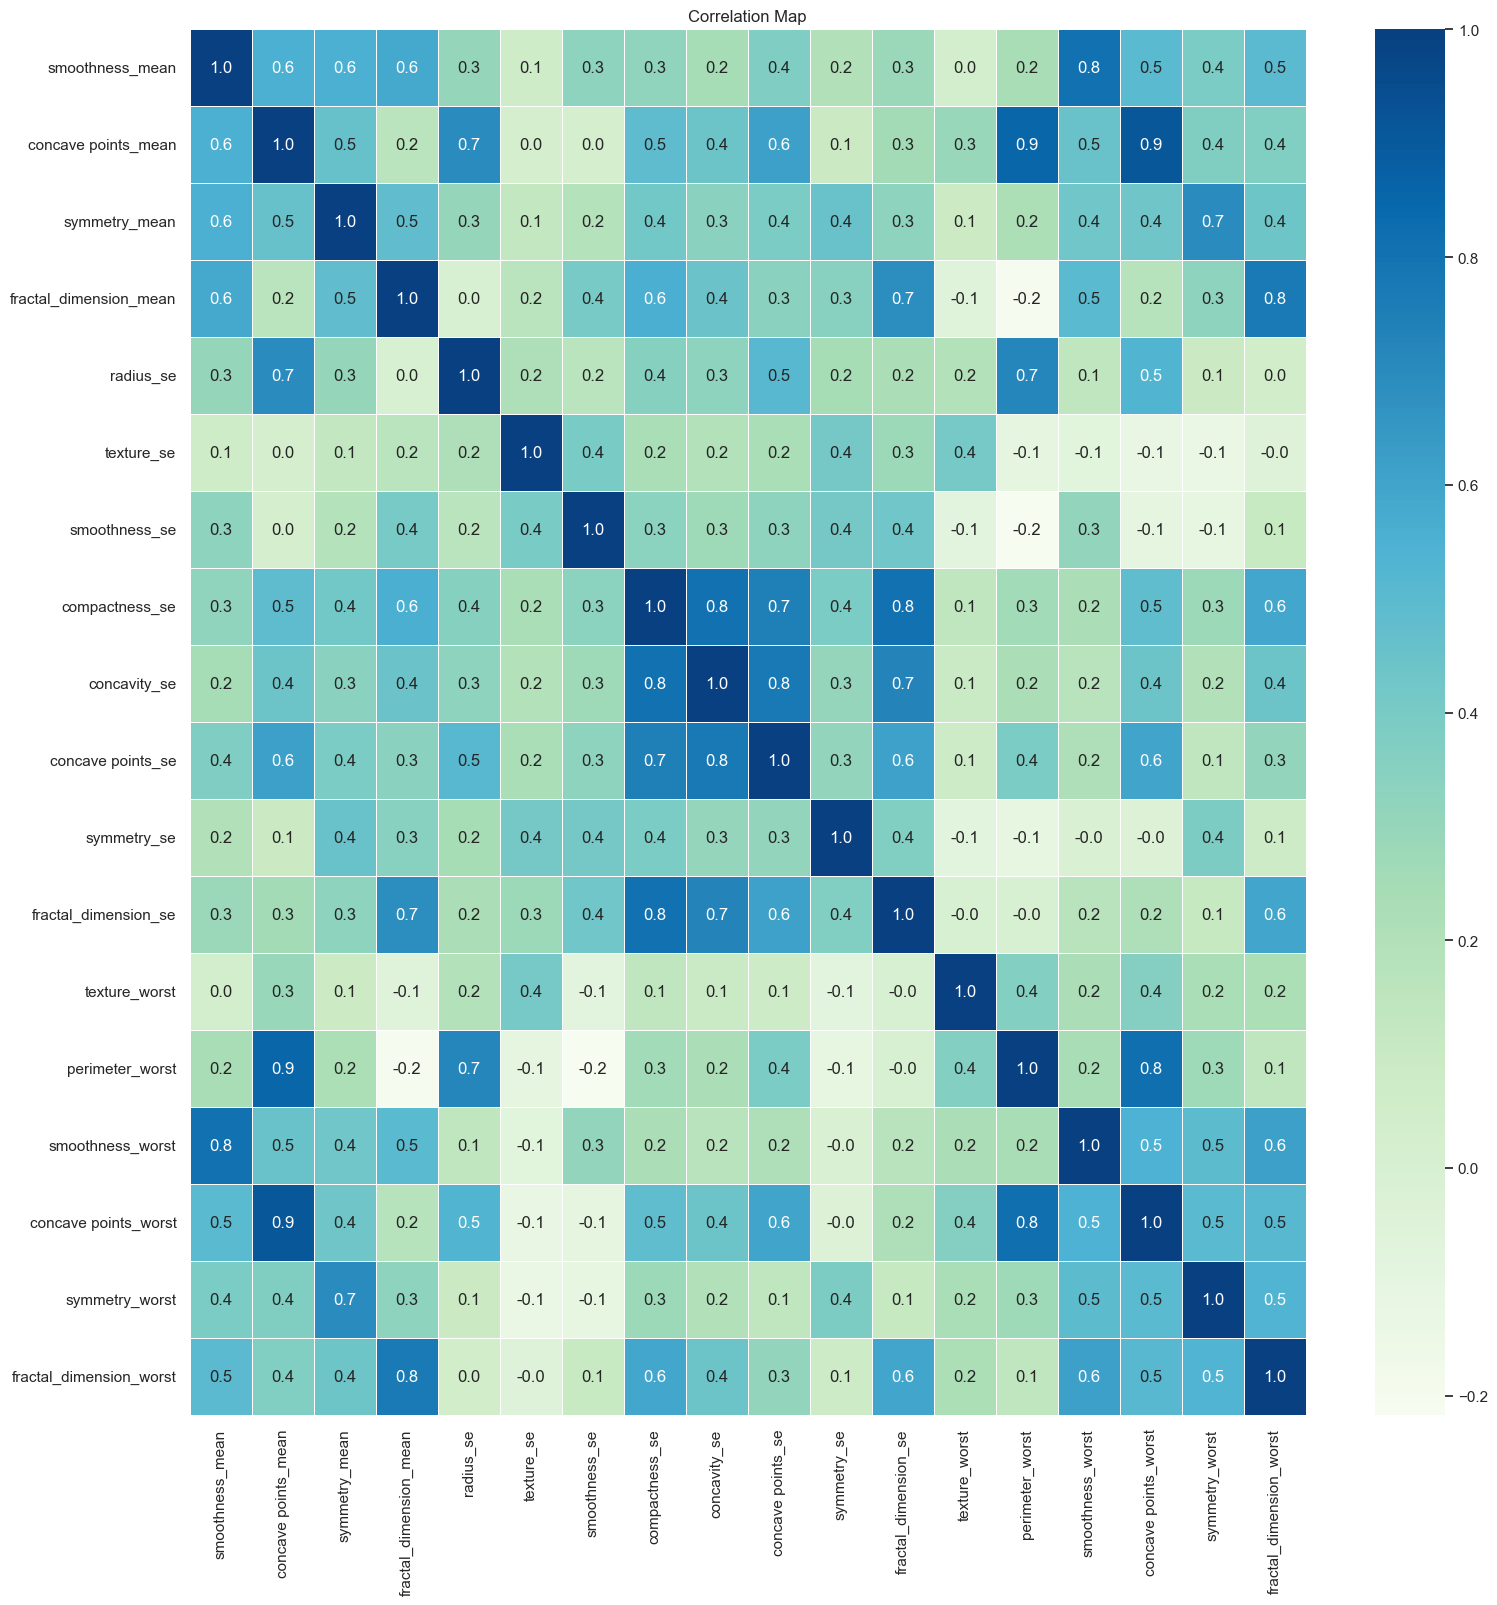

In [33]:
f, ax = plt.subplots(figsize = (18,18))
sns.heatmap(X_upd.corr(), annot=True, linewidths=0.5, fmt=".1f", ax=ax, cmap='GnBu')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Map')
plt.show()

In [48]:
X_train, X_test, y_train , y_test = train_test_split(X_upd, y, random_state=42, shuffle=True, test_size= .2)

In [49]:
parameters = {
    'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],
    'multi_class': ['ovr', 'multinomial'],
}

logreg = LogisticRegression()
grid = GridSearchCV(
    logreg,
    param_grid=parameters,
    scoring='accuracy',
    cv=10,
)
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'multi_class': ['ovr', 'multinomial'],
                         'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag',
                                    'saga']},
             scoring='accuracy')

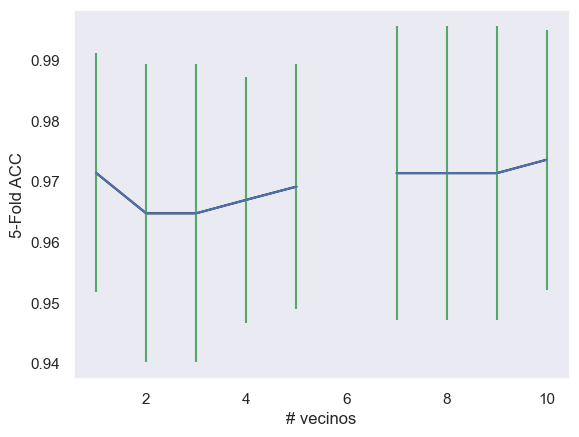

acc (test): 0.98
grid.best_params_ {'multi_class': 'multinomial', 'solver': 'saga'}


In [50]:
scores = np.array(grid.cv_results_['mean_test_score'])
stdvalues = np.array(grid.cv_results_['std_test_score'])
nVecinos = range (1, 11)
plt.plot(nVecinos, scores, '-0')
plt.errorbar(nVecinos, scores, yerr = stdvalues, ecolor = 'g')
plt.xlabel('# vecinos')
plt.ylabel('5-Fold ACC')
plt.grid()
plt.show()

print("acc (test): {:.2f}".format (grid.score(X_test, y_test)))
print("grid.best_params_", grid.best_params_)

In [51]:
def logistic_model(C_, solver_, multiclass_):
    # n_jobs=-1 -> para que use todos los cores que tenga disponibles
    logistic_regression_model = LogisticRegression(random_state=42, solver= solver_, multi_class= multiclass_, n_jobs=-1, C=C_ )
    return logistic_regression_model

In [52]:
model = logistic_model(1, 'sag', 'multinomial')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print("--- CONFUSION MATRIX ---")
print(confusion_matrix(y_test, predictions))
print("\n--- ACCURACY ---")
print(accuracy_score(y_test, predictions))
print("\n--- REPORT ---")
print(classification_report(y_test, predictions))

--- CONFUSION MATRIX ---
[[69  2]
 [ 2 41]]

--- ACCURACY ---
0.9649122807017544

--- REPORT ---
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



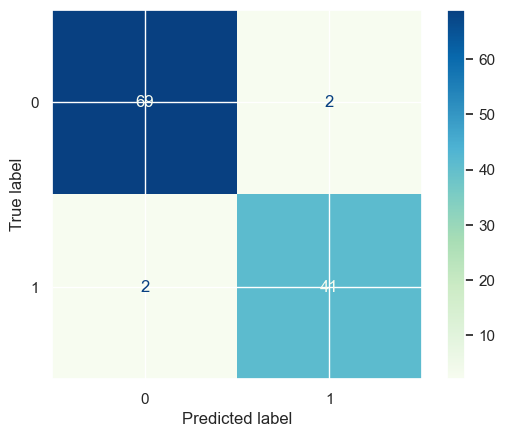

In [53]:
cm = confusion_matrix(y_test, predictions, labels=model.classes_) 
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='GnBu')
plt.show()
#{'M': 1, 'B': 0}

* Confusion Matrix:
    * True Positive (TP): 41 cases were correctly classified as Malignant (1).
    * True Negative (TN): 69 cases were correctly classified as Benign (0).
    * False Positive (FP): 2 cases were incorrectly classified as Malignant, but they are actually Benign. (Type I error)
    * False Negative (FN): 2 cases were incorrectly classified as Benign, but they are actually Malignant. (Type II error)    
.    
* The accuracy is the ratio of correctly predicted instances (TP + TN) to the total instances. In this case, the model has an accuracy of approximately 96.49%.    
.    
* Classification Report:
    * Precision: Precision is the ratio of correctly predicted positive observations to the total predicted positives (TP / (TP + FP)). In this context, it means that when the model predicts a tumor to be malignant, it is correct about 95-97% of the time.
    * Recall (Sensitivity): Recall is the ratio of correctly predicted positive observations to the all observations in the actual class (TP / (TP + FN)). In this context, it means that the model correctly identifies about 95-97% of actual malignant tumors.
    * F1-Score: The F1-score is the weighted average of precision and recall. It considers both false positives and false negatives. It is a good way to show that a classifer has a good value for both precision and recall. The highest possible F1-score is 1, indicating perfect precision and recall.    
.    
* Interpretation:    
    * The model has high accuracy (96.49%), indicating that it performs well in classifying tumors as benign or malignant.
    * The confusion matrix and classification report show that the model has a good balance between precision and recall for both classes.
    * The precision and recall values for both benign (0) and malignant (1) cases are high, suggesting that the model is effective in distinguishing between the two classes.
    * In summary, the logistic regression model appears to be effective in predicting whether a tumor is benign or malignant based on the given features, with a high level of accuracy and balanced precision and recall.

**Class balancing with imblearn**

Now let's test by balancing the data. We have two ways to deal with the problem of class imbalance:

* Make all classes have the same amount of records as the one with the least amount of records, which as a negative effect has that we eliminate many records that can be useful to us.
* Make all classes have the same number of records by creating examples that do not affect the standard deviation or variance of the data set of each class. The problem with this is that we create examples that may be unrealistic and again negatively affect the performance of the model.

For this case, we're going to create new examples so that the classes have the same records.

In [54]:
ros = RandomOverSampler(random_state=42)

In [55]:
X_resampled, y_resampled = ros.fit_resample(X, y)

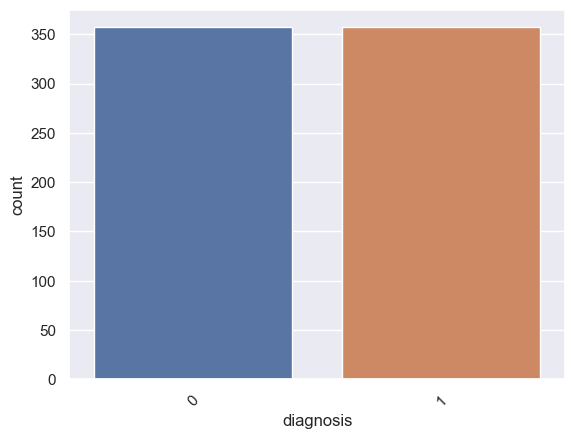

In [56]:
# Balanceamos el dataset
sns.countplot(x=y_resampled, data=df)
plt.xticks(rotation=45)
plt.show()

In [57]:
X_resampled_norm = (X_resampled - X_resampled.mean()) / (X_resampled.std())
X_resampled_train, X_resampled_test, y_resampled_train , y_resampled_test = train_test_split(X_resampled_norm, y_resampled, random_state=42, shuffle=True, test_size= .2)

In [59]:
parameters = {
    'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],
    'multi_class': ['ovr', 'multinomial'],
}

logreg = LogisticRegression()
grid_resampled = GridSearchCV(
    logreg,
    param_grid=parameters,
    scoring='accuracy',
    cv=10,
)
grid_resampled.fit(X_resampled_train, y_resampled_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'multi_class': ['ovr', 'multinomial'],
                         'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag',
                                    'saga']},
             scoring='accuracy')

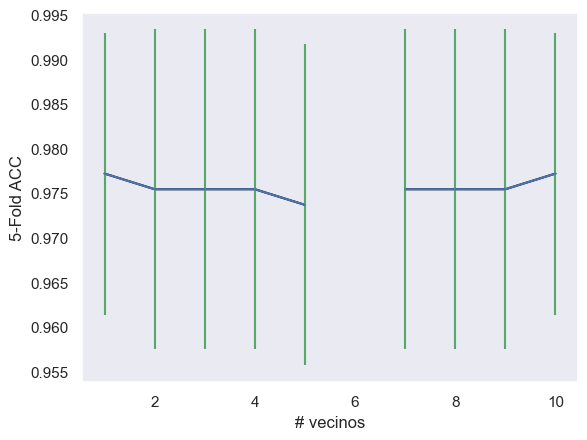

acc (test): 0.97
grid_resampled.best_params_ {'multi_class': 'ovr', 'solver': 'liblinear'}


In [61]:
scores = np.array(grid_resampled.cv_results_['mean_test_score'])
stdvalues = np.array(grid_resampled.cv_results_['std_test_score'])
nVecinos = range (1, 11)
plt.plot(nVecinos, scores, '-0')
plt.errorbar(nVecinos, scores, yerr = stdvalues, ecolor = 'g')
plt.xlabel('# vecinos')
plt.ylabel('5-Fold ACC')
plt.grid()
plt.show()

print("acc (test): {:.2f}".format (grid_resampled.score(X_resampled_test, y_resampled_test)))
print("grid_resampled.best_params_", grid_resampled.best_params_)

In [62]:
model_resampled = logistic_model(1, 'liblinear', 'ovr')
model_resampled.fit(X_resampled_train, y_resampled_train)
predictions_resampled = model_resampled.predict(X_resampled_test)
print("--- CONFUSION MATRIX ---")
print(confusion_matrix(y_resampled_test, predictions_resampled))
print("\n--- ACCURACY ---")
print(accuracy_score(y_resampled_test, predictions_resampled))

--- CONFUSION MATRIX ---
[[67  2]
 [ 3 71]]

--- ACCURACY ---
0.965034965034965


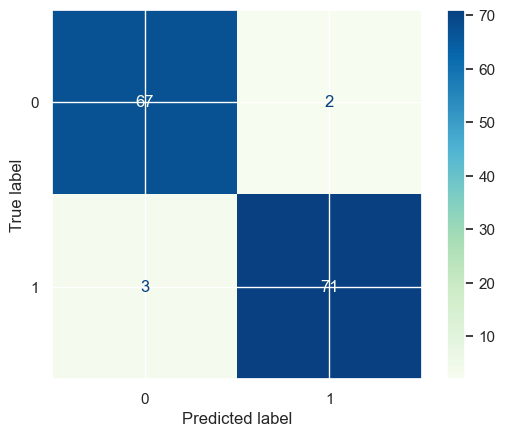

In [63]:
cm = confusion_matrix(y_resampled_test, predictions_resampled, labels=model.classes_) 
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='GnBu')
plt.show()
#{'M': 1, 'B': 0}